### Creating a Convnet

#### Dataset
<li>Airplane</li>
<li>Automobile</li>
<li>Bird</li>
<li>Cat</li>
<li>Deer</li>
<li>Dog</li>
<li>Dog</li>
<li>Frog</li>
<li>Horse</li>
<li>Ship</li>
<li>Truck</li>

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalise pixel values to b/w 0&1
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 1102s 6us/step


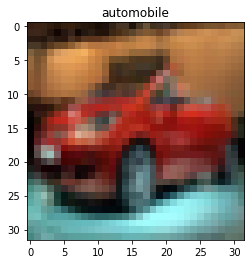

In [17]:
# have a look at an image
i = 45     # change index to see different image

plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.title(class_names[train_labels[i][0]])
plt.show()

## CNN Architecture
<p>A common architecture for a CNN is a stack of conv2D and maxPooling2D layers followed by few densly connected layers.</p>

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#### Layer 1
<p>The input shape of data will be 32, 32, 3 and will process 32 filters of size 3X3 over our input data.</p><br>

#### Layer 2
<p>This layer will perform the max pooling operation using 2X2 samples and a stride of 2.</p><br>

#### Other Layers
<p>They do same job, but take previous layer as input. They increase frequency of filters from 32 to 64.</p><p>Our data shrinks in spacial dimensions drastically but depth of our image increases(but we can afford it computationaly).</p>

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


### Adding Dense Layers

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## Training

In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 43ms/step - loss: 1.5202 - accuracy: 0.4456 - val_loss: 1.2681 - val_accuracy: 0.5365
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1606 - accuracy: 0.5896 - val_loss: 1.1210 - val_accuracy: 0.5998
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0181 - accuracy: 0.6413 - val_loss: 0.9980 - val_accuracy: 0.6408
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9297 - accuracy: 0.6752 - val_loss: 0.9243 - val_accuracy: 0.6776
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8590 - accuracy: 0.6986 - val_loss: 0.9554 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7985 - accuracy: 0.7207 - val_loss: 0.9445 - val_accuracy: 0.6796
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7510 - accuracy: 0.7375 - val_loss: 0.9887 -

## Evaluating the Model

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 3s - loss: 0.8941 - accuracy: 0.7032
0.7031999826431274


### Working with small datasets
#### Data Augmentation :-
<p>To avoid overfitting and create a larger dataset from smaller one we can use a technique called as data augmentation. This is simply performing random transformations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, streches, flipping and even color changes.</p>

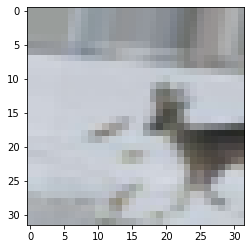

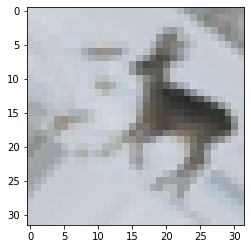

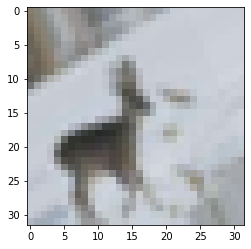

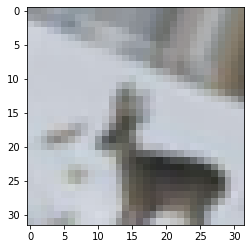

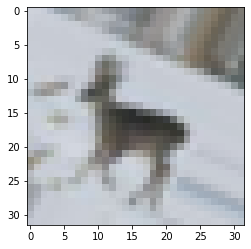

In [18]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break
plt.title(class_names[train_labels[i][0]])
plt.show()